In [31]:
import pandas as pd
import numpy as np 
from keras.models import Sequential 
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn import svm
from sklearn.metrics import precision_score

In [32]:
data = pd.read_csv('big_five_scores.csv' )

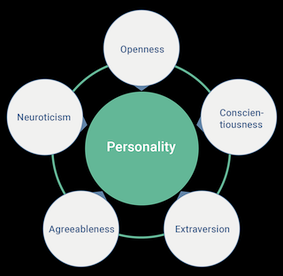

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307313 entries, 0 to 307312
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   case_id                  307313 non-null  int64  
 1   country                  307141 non-null  object 
 2   age                      307313 non-null  int64  
 3   sex                      307313 non-null  int64  
 4   agreeable_score          307313 non-null  float64
 5   extraversion_score       307313 non-null  float64
 6   openness_score           307313 non-null  float64
 7   conscientiousness_score  307313 non-null  float64
 8   neuroticism_score        307313 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 21.1+ MB


In [34]:
data = data.fillna(value=0)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307313 entries, 0 to 307312
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   case_id                  307313 non-null  int64  
 1   country                  307313 non-null  object 
 2   age                      307313 non-null  int64  
 3   sex                      307313 non-null  int64  
 4   agreeable_score          307313 non-null  float64
 5   extraversion_score       307313 non-null  float64
 6   openness_score           307313 non-null  float64
 7   conscientiousness_score  307313 non-null  float64
 8   neuroticism_score        307313 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 21.1+ MB


In [40]:
df = data.drop('case_id','age','sex',axis=1)

TypeError: drop() got multiple values for argument 'axis'

In [36]:
data.describe()

,case_id,age,sex,agreeable_score,extraversion_score,openness_score,conscientiousness_score,neuroticism_score
count,307313.000000,307313.000000,307313.000000,307313.000000,307313.000000,307313.000000,307313.000000,307313.000000
mean,166682.535672,25.192937,1.602477,0.696807,0.672329,0.733941,0.701998,0.574399
std,96147.237866,10.000932,0.489387,0.093562,0.108680,0.087609,0.107378,0.125749
min,1.000000,10.000000,1.000000,0.200000,0.200000,0.253333,0.206667,0.196667
25%,83653.000000,18.000000,1.000000,0.640000,0.600000,0.673333,0.630000,0.486667
50%,166286.000000,22.000000,2.000000,0.703333,0.680000,0.736667,0.706667,0.570000
75%,249627.000000,29.000000,2.000000,0.763333,0.750000,0.796667,0.776667,0.660000
max,334161.000000,99.000000,2.000000,1.000000,0.993333,0.996667,1.000000,0.996667


In [22]:
print('Is there any missing value? ', data.isnull().values.any())
print('How many missing values? ', data.isnull().values.sum())
data.dropna(inplace=True)
print('Number of participants after eliminating missing values: ', len(data))

Is there any missing value?  True
How many missing values?  172
Number of participants after eliminating missing values:  307141


In [23]:
data["agreeable_score"].value_counts()

0.726667    4673
0.713333    4628
0.723333    4614
0.706667    4582
0.730000    4560
            ... 
0.220000       1
1.000000       1
0.973333       1
0.200000       1
0.243333       1
Name: agreeable_score, Length: 228, dtype: int64

In [24]:
data["extraversion_score"].value_counts()

0.696667    3936
0.700000    3805
0.690000    3781
0.706667    3773
0.686667    3730
            ... 
0.210000       1
0.200000       1
0.993333       1
0.233333       1
0.246667       1
Name: extraversion_score, Length: 231, dtype: int64

In [25]:
data["openness_score"].value_counts()

0.726667    4574
0.743333    4572
0.720000    4550
0.750000    4500
0.723333    4499
            ... 
0.276667       1
0.333333       1
0.320000       1
0.993333       1
0.346667       1
Name: openness_score, Length: 206, dtype: int64

In [26]:
data["conscientiousness_score"].value_counts()

0.710000    3784
0.733333    3706
0.700000    3695
0.713333    3694
0.723333    3693
            ... 
0.236667       1
0.246667       1
0.250000       1
0.206667       1
0.243333       1
Name: conscientiousness_score, Length: 232, dtype: int64

In [27]:
data["neuroticism_score"].value_counts()

0.576667    3210
0.556667    3185
0.566667    3170
0.570000    3165
0.573333    3156
            ... 
0.206667       1
0.996667       1
0.203333       1
0.993333       1
0.196667       1
Name: neuroticism_score, Length: 241, dtype: int64

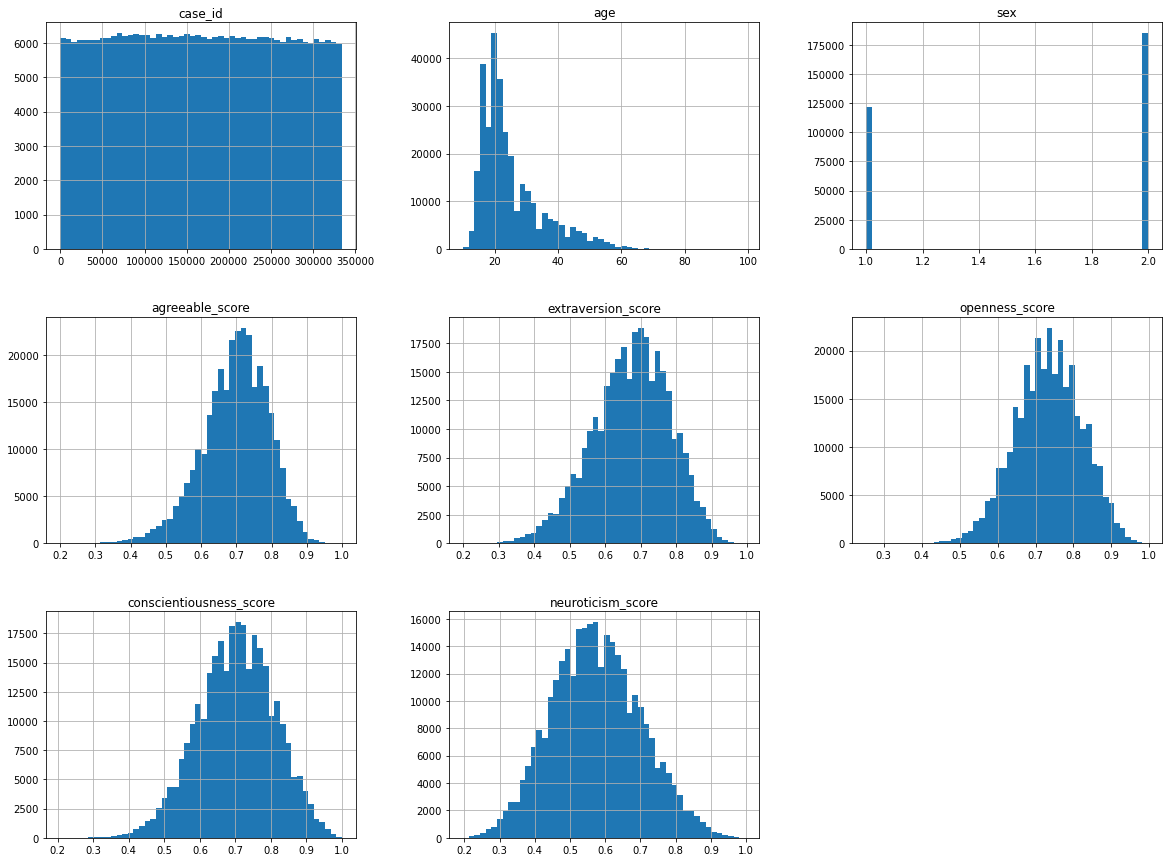

In [28]:
%matplotlib inline 
import matplotlib.pyplot as plt 
data.hist(bins=50, figsize=(20,15))
plt.show()

In [41]:
def SVCModel(trait) :
    data[trait] = data[trait].aply(labelclasses)
    X = data.loc[:,'mediaUsage':'Scheduling_officeTools_weather'].values

In [44]:
seed=7
np.random.seed(seed)
estimators =[]
estimators.append(('standrdize',StandardScaler()))
model = svm.SVC(kernel='rbf',C=0.8,gamma='auto')
estimators.append(('mlp',model))
pipeline = Pipeline(estimators)

In [45]:
kfold = KFold(n_splits=4, random_state=seed)
predicted = cross_val_predict(pipeline,X,Y,cv=kfold)

S:\New folder (2)\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


NameError: name 'X' is not defined

In [ ]:
print(confusion_matrix(Y,predicted))

In [ ]:
return(precision_score(Y,predicted, average='macro'))

In [ ]:
traits=['Openness','Conscientiousness','Extraversion','Agreeableness','Neuroticism']

In [ ]:
for trait in traits :
    print(trait,SVCModel(trait))